# Unit 5 - Financial Planning


In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [87]:
# Load .env enviroment variables
load_dotenv("Resources/.WBF.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [15]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [17]:
import json 
btc_data = requests.get(btc_url).json()

In [18]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
btc_price

49448.0

In [19]:
eth_data = requests.get(eth_url).json()

In [20]:
# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

2192.84

In [21]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $59337.60
The current value of your 5.3 ETH is $11622.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [22]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [23]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [24]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Preview DataFrame
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
stock_df.index = stock_df.index.date
stock_df

AGG                                     SPY                  \
              open   high     low   close   volume    open    high     low   
2021-04-22  114.74  114.8  114.59  114.77  3518947  415.88  416.78  411.13   

                             
            close    volume  
2021-04-22  412.3  90086341

In [25]:
# Get current closing prices for SPY and AGG
agg_close_price = float(stock_df["AGG"]["close"])
spy_close_price = float(stock_df["SPY"]["close"])

In [26]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.77
Current SPY closing price: $412.3


In [27]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20615.00
The current value of your 200 AGG shares is $22954.00


### Savings Health Analysis

In [45]:
# Set monthly household income
monthly_income = 1200

# Create savings DataFrame
savings_data = {
    "Shares": [my_spy_value + my_agg_value],
    "Crypto": [my_btc_value + my_eth_value]
}

df_savings = pd.DataFrame.from_dict(savings_data, orient='index', columns=["Amount"])


# Display savings DataFrame
display(df_savings)

,Amount
Shares,43569.000
Crypto,70959.652


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

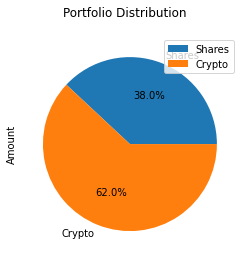

In [47]:
# Plot savings pie chart
df_savings.plot.pie(autopct='%1.1f%%', title="Portfolio Distribution", subplots=True)

In [51]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Amount"]["Shares"] + df_savings["Amount"]["Crypto"]

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congrats! You're savings of ${total_savings} is enough to be safe in case of emergency")
if total_savings == emergency_fund:
    print(f"Congrats! You met you're financial goal of ${total_savings}")
if total_savings < emergency_fund:
    print(f"You need to save ${emergency_fund - total_savings} in order to meet your financial goal")

Congrats! You're savings of $114528.652 is enough to be safe in case of emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [52]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-22', tz='America/New_York').isoformat()

In [53]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                          SPY            \
              open    high      low    close     volume    open      high   
2017-05-02  108.68  108.94  108.679  108.890  2570794.0     NaN       NaN   
2017-05-03  108.97  108.99  108.770  108.795  1765578.0  238.32  238.8775   
2017-05-04  108.55  108.70  108.550  108.665  1789624.0  238.83  238.9225   
2017-05-05  108.72  108.74  108.570  108.720  1287794.0  239.18  239.7200   
2017-05-08  108.63  108.67  108.490  108.495  1579134.0  239.76  239.9200   

                                        
               low   close      volume  
2017-05-02     NaN     NaN         NaN  
2017-05-03  237.70  238.52  47292627.0  
2017-05-04  237.78  238.75  46170233.0  
2017-05-05  238.68  239.72  43733544.0  
2017-05-08  239.17  239.67  32087919.0

In [55]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
df_stock_forcast = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [58]:
# Printing the simulation input data
df_stock_forcast.portfolio_data.dropna().head()

AGG                                                      SPY  \
              open    high     low    close     volume daily_return    open   
2017-05-04  108.55  108.70  108.55  108.665  1789624.0    -0.001195  238.83   
2017-05-05  108.72  108.74  108.57  108.720  1287794.0     0.000506  239.18   
2017-05-08  108.63  108.67  108.49  108.495  1579134.0    -0.002070  239.76   
2017-05-09  108.43  108.51  108.40  108.495  2395343.0     0.000000  239.96   
2017-05-10  108.60  108.66  108.44  108.520  1427511.0     0.000230  239.38   

                                                               
                high     low   close      volume daily_return  
2017-05-04  238.9225  237.78  238.75  46170233.0     0.000964  
2017-05-05  239.7200  238.68  239.72  43733544.0     0.004063  
2017-05-08  239.9200  239.17  239.67  32087919.0    -0.000209  
2017-05-09  240.1900  239.04  239.46  39723891.0    -0.000876  
2017-05-10  239.8700  239.15  239.85  34222778.0     0.001629

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df_stock_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982340,1.015336,0.997114,1.009582,0.993659,0.995708,0.993239,1.014595,1.008630,1.013435,...,1.019850,0.987760,0.996175,1.000977,1.013350,0.999950,1.003629,1.003252,0.993821,1.012507
2,0.987523,1.019502,1.003811,1.000043,0.996191,0.988325,0.997589,1.017005,0.999302,1.021898,...,1.032395,0.991961,1.009349,0.994745,1.014049,0.986392,1.006346,1.010075,0.992198,1.016816
3,0.987258,1.015078,0.999600,0.994168,1.003663,0.987599,1.000600,1.011623,1.004526,1.023432,...,1.023816,0.996827,1.016818,1.003288,1.008766,0.996591,1.005286,1.009159,0.986601,1.000963
4,0.980686,1.014620,1.011445,0.991921,1.002397,1.007557,0.982514,1.015981,0.998582,1.028314,...,1.017325,0.992408,1.021351,1.010116,1.003996,0.989456,0.996394,1.007151,0.974502,0.993934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.546051,4.401616,8.991781,13.135244,15.857287,26.258948,8.877415,10.785241,34.468315,33.249175,...,19.419475,12.477001,24.861894,22.322386,36.194315,33.329988,14.455095,54.726029,25.693549,15.768332
7557,11.514043,4.423460,9.069505,13.132474,15.729608,26.560921,8.915876,10.747609,34.413820,33.631403,...,19.461324,12.570440,24.893211,22.303376,36.407961,33.472325,14.522811,55.292531,25.574146,15.987017
7558,11.650256,4.390650,9.038485,13.225613,15.671598,26.534627,8.821131,10.708345,34.016645,33.528008,...,19.358175,12.494770,25.086337,22.510734,36.793194,33.335922,14.643482,56.104783,25.461407,16.154095
7559,11.772968,4.432116,9.187782,13.181578,15.740385,26.272529,8.865020,10.721785,33.691700,33.584392,...,19.516391,12.421811,24.766618,22.646674,36.703664,32.889744,14.589117,56.787089,25.411709,16.216444


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

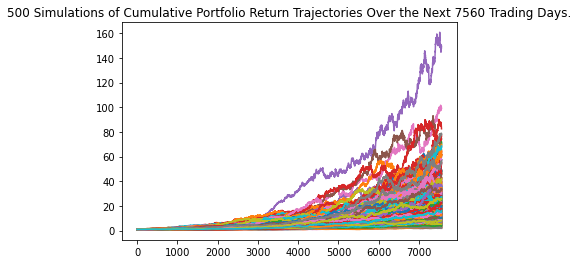

In [61]:
# Plot simulation outcomes
df_stock_forcast.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

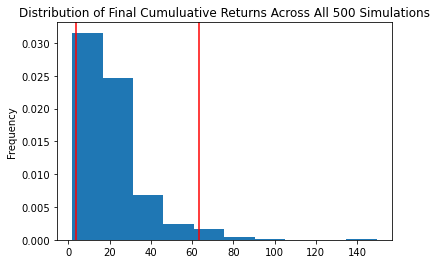

In [62]:
# Plot probability distribution and confidence intervals
df_stock_forcast.plot_distribution()

### Retirement Analysis

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = df_stock_forcast.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean             21.265878
std              15.694176
min               1.858598
25%              10.687044
50%              17.514042
75%              26.658571
max             149.418423
95% CI Lower      3.873025
95% CI Upper     63.414210
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [66]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stats[8]*(initial_investment),2)
ci_upper = round(sum_stats[9]*(initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77460.51 and $1268284.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [67]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stats[8]*(initial_investment_2),2)
ci_upper = round(sum_stats[9]*(initial_investment_2),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $116190.76 and $1902426.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims_2 = 500
df_5yr_forecast = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.90, .10],
    num_simulation = num_sims_2,
    num_trading_days = 252*5
)

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
df_5yr_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996479,1.004248,0.999472,1.002127,1.000715,1.003807,1.001186,0.996852,0.996480,0.999892,...,0.999204,1.003341,1.000172,1.002508,1.003319,0.994221,0.997461,0.998180,1.002316,1.002169
2,1.001402,1.003344,0.993962,1.002891,0.999518,1.006350,1.006416,0.998971,0.997014,1.004530,...,0.998432,1.002893,1.002897,1.006967,1.007861,0.995398,0.993834,0.995465,1.003571,0.998540
3,1.006904,1.001453,0.993455,1.006250,1.002509,1.006289,1.004750,1.005480,0.999960,1.001926,...,1.001405,1.004978,1.004201,1.009964,1.003819,0.992001,0.992695,0.996692,1.007784,0.994370
4,1.008950,1.002411,0.993693,1.008698,1.005568,1.007610,1.006928,1.004747,0.997891,1.004574,...,1.000876,1.006971,1.004351,1.009259,1.003703,0.994618,0.989176,0.999254,1.012396,0.989363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.009464,0.955936,1.250066,1.013604,1.092064,1.306937,1.320614,1.460990,1.157930,1.172611,...,1.069447,1.269485,1.242096,1.143240,1.094097,1.038530,1.166108,1.219506,1.154327,1.220514
1257,1.008315,0.965513,1.247140,1.013450,1.091452,1.309032,1.313849,1.474112,1.158779,1.172551,...,1.074882,1.267701,1.248081,1.144035,1.101944,1.045319,1.166201,1.214205,1.158155,1.220834
1258,1.006816,0.967421,1.250518,1.014845,1.094655,1.307031,1.314682,1.469027,1.158937,1.168435,...,1.069428,1.262780,1.251592,1.145968,1.103855,1.045467,1.170730,1.202389,1.160137,1.216668
1259,1.004937,0.970777,1.249954,1.014671,1.091323,1.311317,1.310558,1.463218,1.155340,1.163523,...,1.069636,1.260589,1.255779,1.146628,1.098519,1.041304,1.166648,1.197713,1.160640,1.215319


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

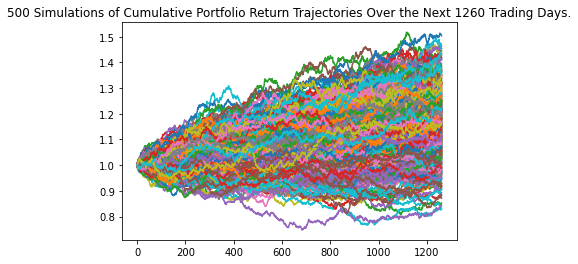

In [82]:
# Plot simulation outcomes
df_5yr_forecast.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

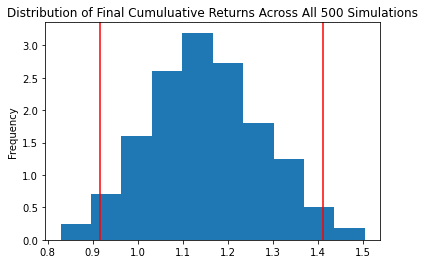

In [83]:
# Plot probability distribution and confidence intervals
df_5yr_forecast.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_statistics = df_5yr_forecast.summarize_cumulative_return()

# Print summary statistics
print(sum_statistics)

count           500.000000
mean              1.150200
std               0.125492
min               0.828249
25%               1.062198
50%               1.148288
75%               1.233961
max               1.504040
95% CI Lower      0.916097
95% CI Upper      1.410786
Name: 1260, dtype: float64


In [88]:
# Set initial investment
initial_investment_5yr = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_5yr = round(sum_statistics[8] * initial_investment_5yr,2)
ci_upper_5yr = round(sum_statistics[9] * initial_investment_5yr,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5yr} and ${ci_upper_5yr}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18321.93 and $28215.72
